

Analyzing Telco's customer database, which contains valuable information about its customer attributes.

Our goal is to identify and predict customers who are more likely to churn or leave the company.

If you find this analysis valuable, please consider upvoting the Kernel. Your support would be greatly appreciated!"

### Require Library

In [48]:
import pandas as pd # for data manipulation
import numpy as np # for matrix array
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm # for statistical analysis
import warnings
warnings.filterwarnings("ignore")

In [49]:
#input dataset
df = pd.read_csv('C:\\Users\\Sakawat Siyam\\Downloads\\archive\\Customer-Churn.csv')

In [50]:
# check first five rows of data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
#checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset is complete with no missing values, featuring over 7000 rows and 21 attributes (columns).

Furthermore, certain data that should be categorical is currently stored as numerical values, which we'll address for better analysis.

### Here the SeniorCitizen are integer value. We convert into object type.

In [52]:
df['SeniorCitizen']= df.SeniorCitizen.astype('object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The SeniorCitizen column, which indicates whether the customer is elderly or not through a dummy variable (0 and 1), has been correctly updated and saved as a qualitative variable

We should convert the 'TotalCharges' column to a numerical format as it represents the total revenue generated by the client. To achieve this, we will utilize the 'to_numeric()' function provided by pandas

When the conversion cannot be executed, the 'errors = 'coerce'' parameter transforms records into NaN values

In [54]:
df.TotalCharges =pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Following the conversion, 11 null values emerged. We will address this by filling them with the product of the 'tenure' and 'MonthlyCharges' columns. The 'tenure' column represents the customer's duration in months with the company, while 'MonthlyCharges' indicates the monthly payment amount.

In [56]:
# check the null value
df.TotalCharges.isnull().sum()

11

In [57]:
# fill these null values
df.TotalCharges.fillna(value = df.tenure * df.MonthlyCharges,inplace = True)

In [58]:
df.TotalCharges.isnull().sum()

0



Great, the problem is resolved!

Now that all the variables are in order, we can begin our data exploration. Our objective is to uncover insights such as which customers tend to spend more and stay longer with the company.

Let's kick off our exploration by examining a statistical summary of the numerical variables, which include:

1. Tenure: The duration in months that customers remain with the company.
2. MonthlyCharge: The value of the customer's monthly payment.
3. TotalCharges: The cumulative amount paid by the customer.

# Explotary Analysis

In [59]:
# check the statistics of the dataset
df.describe().round()

,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0
mean,32.0,65.0,2280.0
std,25.0,30.0,2267.0
min,0.0,18.0,0.0
25%,9.0,36.0,399.0
50%,29.0,70.0,1395.0
75%,55.0,90.0,3787.0
max,72.0,119.0,8685.0


1. Approximately half of the clients have a tenure of over 29 months, which is slightly more than two years.

2. On average, the monthly payment is around $30

3. The average total revenue generated per customer is approximately $2,280.

## Relationships between variables

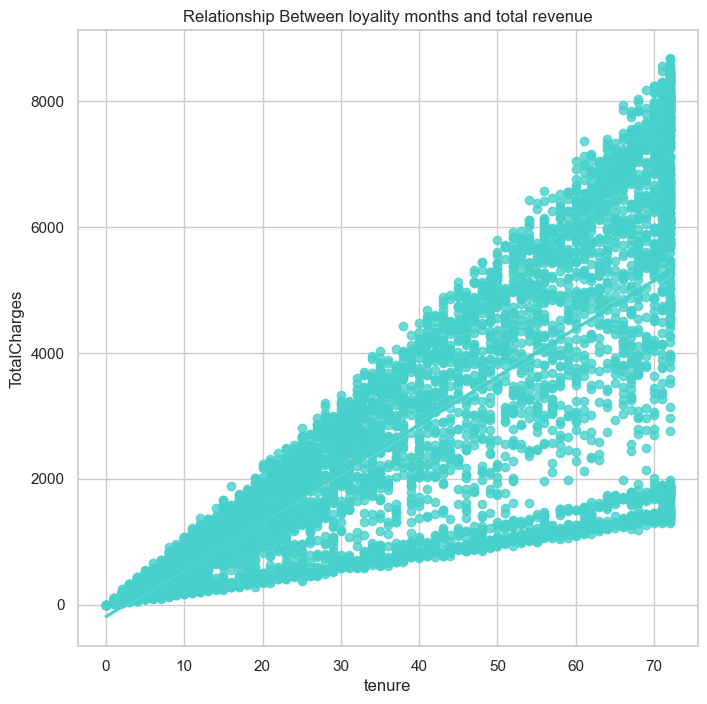

In [60]:
# lets create variable of numeric values
numerics = df[['tenure','MonthlyCharges','TotalCharges','Churn']]

#create a regression plot
plt.figure(figsize = (8,8))
sns.regplot(x = 'tenure',y = 'TotalCharges', color = '#48D1CC',data = numerics)
plt.title('Relationship Between loyality months and total revenue')
plt.show()

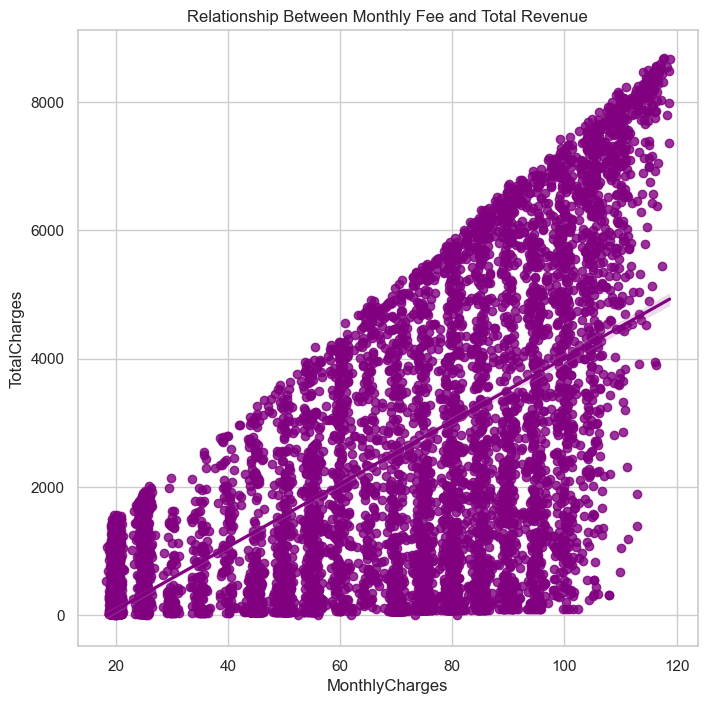

In [61]:
plt.figure(figsize=(8,8))
ax= sns.regplot(x= 'MonthlyCharges',y='TotalCharges',data=numerics,color= '#800080')
plt.title('Relationship Between Monthly Fee and Total Revenue')
plt.show()

<Figure size 1500x1000 with 0 Axes>

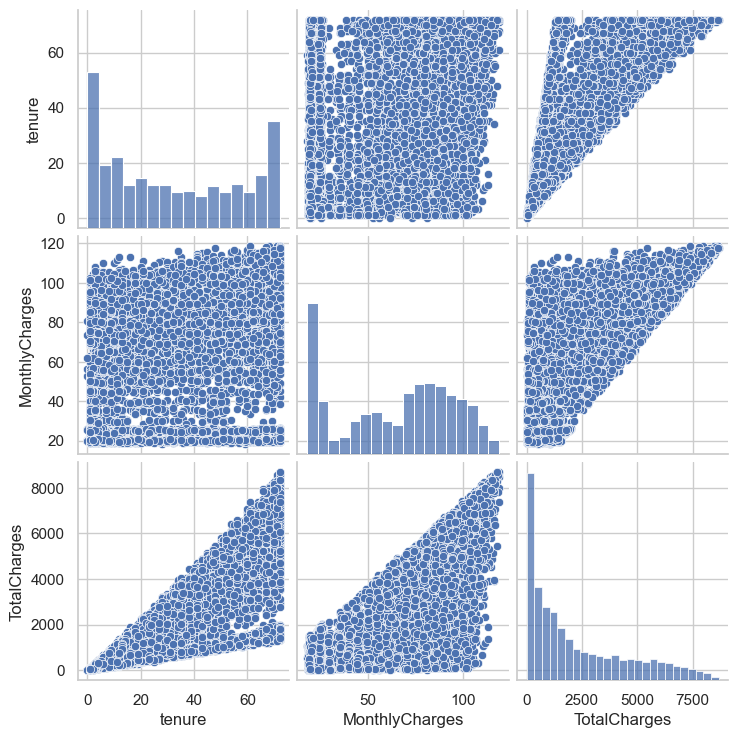

In [62]:
#create pairplot
plt.figure(figsize=(15,10))
sns.pairplot(numerics)
plt.show()

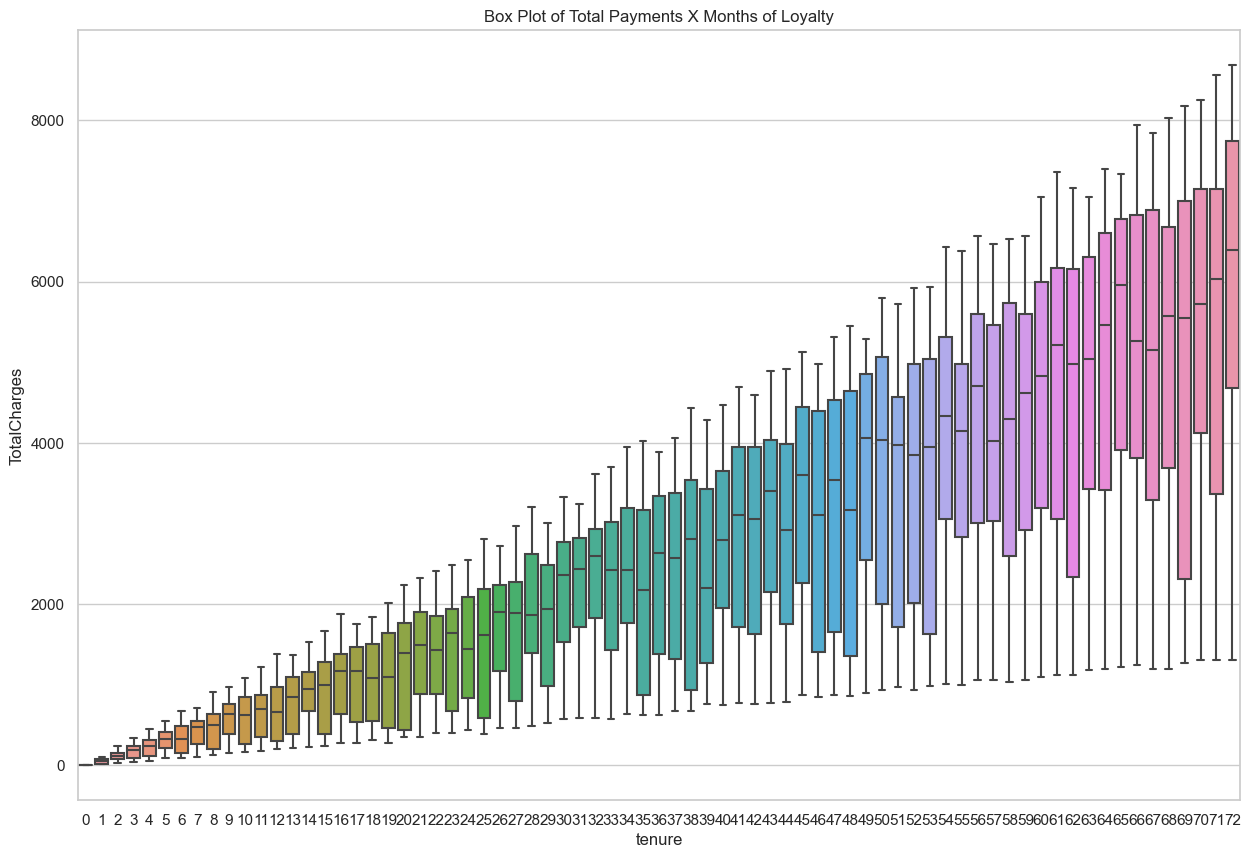

In [63]:
# create boxplot
plt.figure(figsize=(15,10))
sns.boxplot(x='tenure',y='TotalCharges',data=df)
plt.title('Box Plot of Total Payments X Months of Loyalty')
plt.show()

In our exploration, we have observed linear relationships between the duration of a customer's tenure and their total expenses, as expected. This means that the longer a customer stays with us, the greater their total spending.

We've also noted a linear relationship between the monthly fee and total revenue. Customers with higher monthly payments contribute to higher overall revenue.

Interestingly, there is no significant correlation between the duration of a customer's tenure and an increase in their monthly payments. This suggests that many clients remain with their current services for an extended period without upgrading their plans, while some may start with more expensive plans from the beginning.

Furthermore, by examining boxplots, we've determined that the dataset, in general, lacks outliers

let's now delve into the categorical variables. For all our analyses, we will consider the 'Churn' variable, which serves as our target variable. 'Churn' indicates whether a customer has left the company or not, and it holds a central role in our exploratory views.

In [64]:
# now check the statistics of categorical variable
df.describe(include='object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Here's a concise version of your observations:

1. The majority of customers are not classified as Senior.
2. Fiber optics is the most popular choice for internet service.
3. Most customers opt not to receive printed accounts.
4. Electronic payment is the most widely preferred payment method.

These observations provide a quick overview of the categorical variables in the dataset.

### Let's Investigate the Senior Citizen

Does the age group have an impact on customer churn?

In [65]:
#creat a crosstab of Churn and Senior Citizen
pd.crosstab(df.Churn,df.SeniorCitizen,margins =True)

SeniorCitizen,0,1,All
Churn,,,
No,4508,666,5174
Yes,1393,476,1869
All,5901,1142,7043


In [66]:
# lets makes a function
print('The percentage of senior customers who churned : {:.2f}%'.format(476/1142*100))
print('The non senior population is :{:.2f}%'.format(1393/5901*100))

The percentage of senior customers who churned : 41.68%
The non senior population is :23.61%


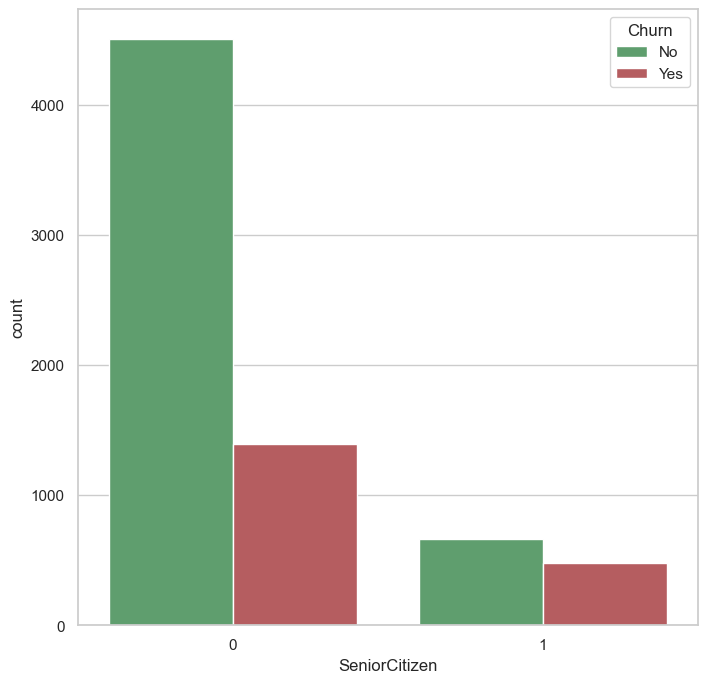

In [67]:
plt.figure(figsize=(8, 8))
sns.set(style='whitegrid')

# You can specify custom colors for each hue category
custom_colors = {"No": "g", "Yes": "r"}

sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette=custom_colors)
plt.show()

In terms of proportions, the number of older people leaving the company is significantly higher compared to the non-elderly population. This suggests a potential dependency relationship that is worth investigating further. To determine whether this association is statistically significant, a chi-square test can be employed.

As a side note, it's interesting to explore the monthly average spending differences between young and old customers?

In [68]:
mean_median_idoso = df[df['SeniorCitizen']==1]
mean_median_idoso = mean_median_idoso.MonthlyCharges.mean()
mean_median_idoso

n_idoso_median_mean =df[df['SeniorCitizen']==0]
n_idoso_median_mean = n_idoso_median_mean.MonthlyCharges.mean()

print('The average monthly expenditure for the elderly is :{:.2f}$'.format(mean_median_idoso))
print('The average monthly expenditure for non-elderly individuals is :{:.2f}$'.format(n_idoso_median_mean))

The average monthly expenditure for the elderly is :79.82$
The average monthly expenditure for non-elderly individuals is :61.85$


In [69]:
#check
median_mean_idade =df.groupby('SeniorCitizen').mean()
median_mean_idade.round()

,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,,,
0,32.0,62.0,2177.0
1,33.0,80.0,2810.0


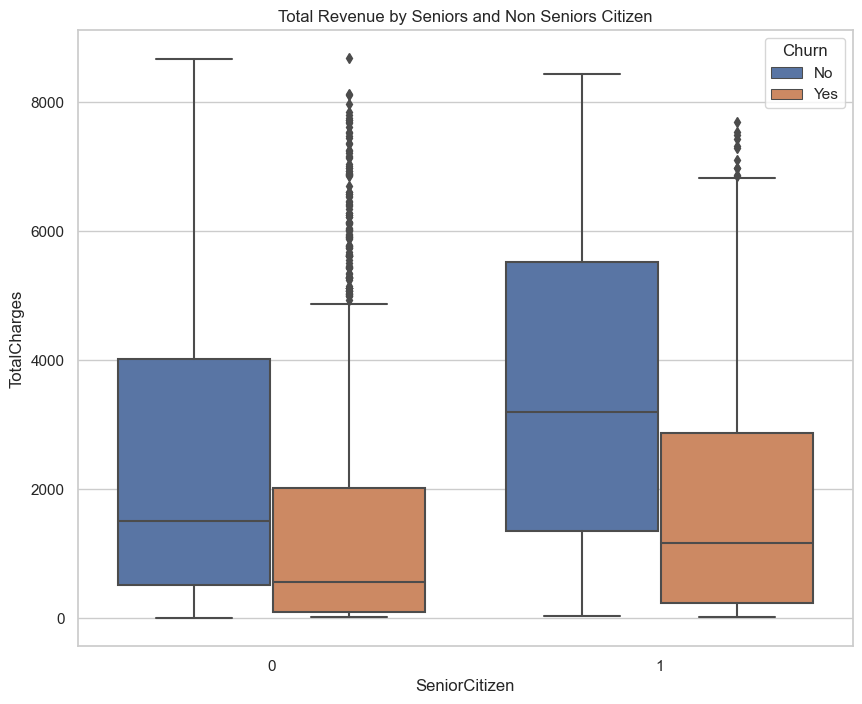

In [70]:
plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
sns.boxplot(x= df.SeniorCitizen,y=df.TotalCharges, hue=df.Churn)
plt.title('Total Revenue by Seniors and Non Seniors Citizen')
plt.show()

In [71]:
# percentage of senior citizen
df.SeniorCitizen.value_counts(normalize= True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

Although they represent just 16% of the client base, the elderly demographic tends to spend more within the company. They have a higher monthly average spending, generate more revenue, and exhibit higher loyalty on average. However, it's noteworthy that they also have a significantly higher churn rate compared to the younger audience, which is evident in the graphic.

These findings align with our expectations. Elderly individuals often spend more time at home, possibly due to retirement or a more leisurely lifestyle, leading to increased television consumption. This, in turn, drives them to subscribe to more comprehensive and relatively expensive packages.

Given these insights, it would be advisable to conduct a more in-depth analysis to uncover the reasons behind the higher churn rate among the elderly and formulate strategies to enhance their retention and attraction.

This initial analysis has already unearthed valuable insights, and this is only considering age as a variable

### Investigate the Gender variable

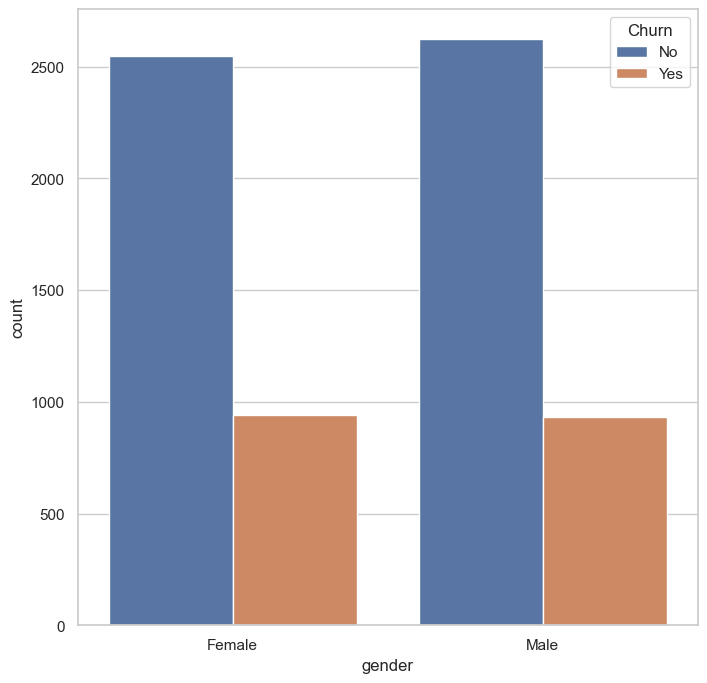

In [72]:
plt.figure(figsize=(8, 8))
sns.set(style='whitegrid')

sns.countplot(x='gender', hue='Churn', data=df)
plt.show()

In [73]:
receita_gender = df.groupby(by = 'gender')['TotalCharges','MonthlyCharges'].mean().round()
receita_gender

,TotalCharges,MonthlyCharges
gender,,
Female,2280.0,65.0
Male,2280.0,64.0


In [74]:
df.groupby(by = 'gender')['tenure'].mean().round()

gender
Female    32.0
Male      32.0
Name: tenure, dtype: float64

There is no discernible behavioral difference between women and men

### Let's explore the 'Partner' variable, which indicates whether the customer has a partner in a relationship.

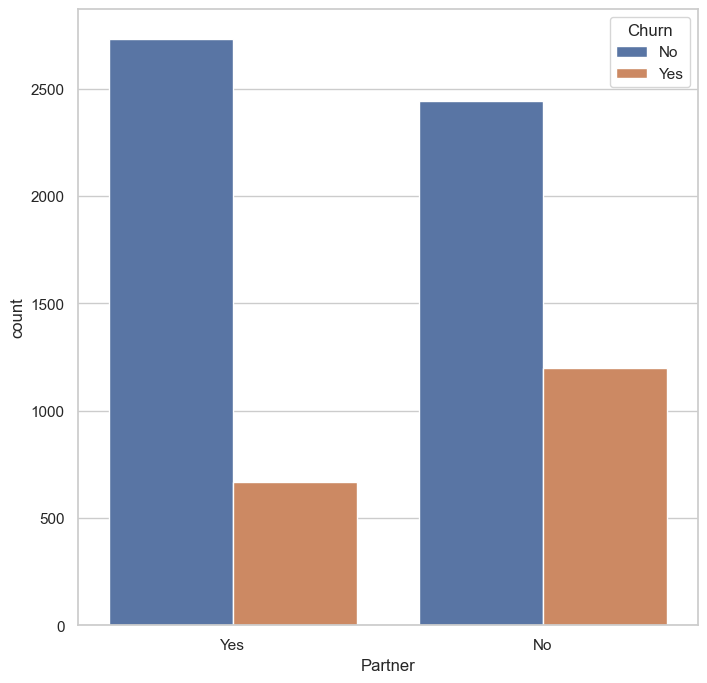

In [75]:
plt.figure(figsize=(8,8))
sns.set(style='whitegrid')
sns.countplot(x='Partner',data= df,hue='Churn')
plt.show()

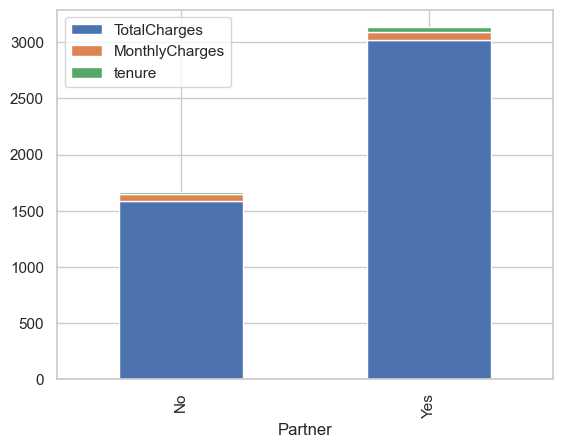

In [76]:
df.groupby('Partner')['TotalCharges','MonthlyCharges','tenure'].mean().plot(kind='bar',stacked=True)
figsize=(8,8)
plt.show()

There's a significant difference between customers with partners and those without partners. Customers with partners, particularly married individuals, tend to spend considerably more money with the company and have longer tenures. This could be due to factors like having children and opting for more comprehensive packages.



Let's explore this possibility further

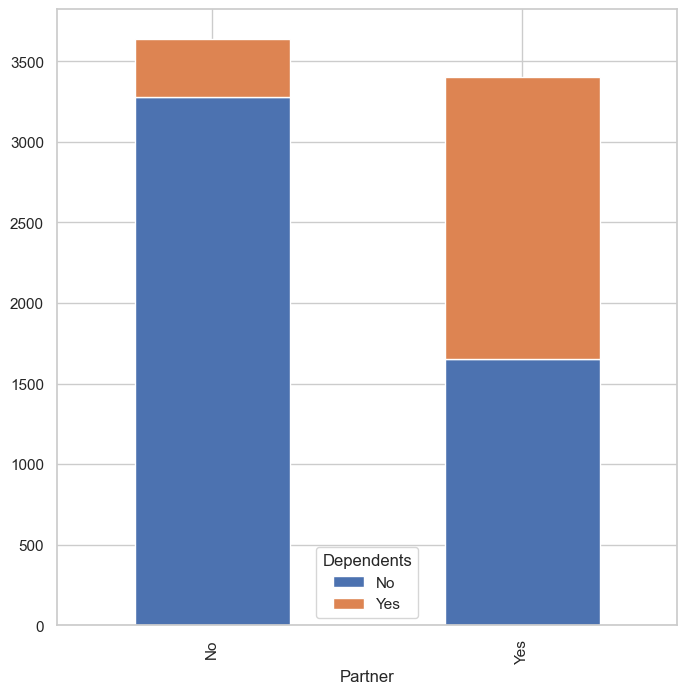

In [77]:
pd.crosstab(df.Partner,df.Dependents).plot(kind='bar',stacked=True,figsize=(8,8))
plt.show()

Indeed, individuals with partners tend to have more dependents, often in the form of children, compared to those who are single

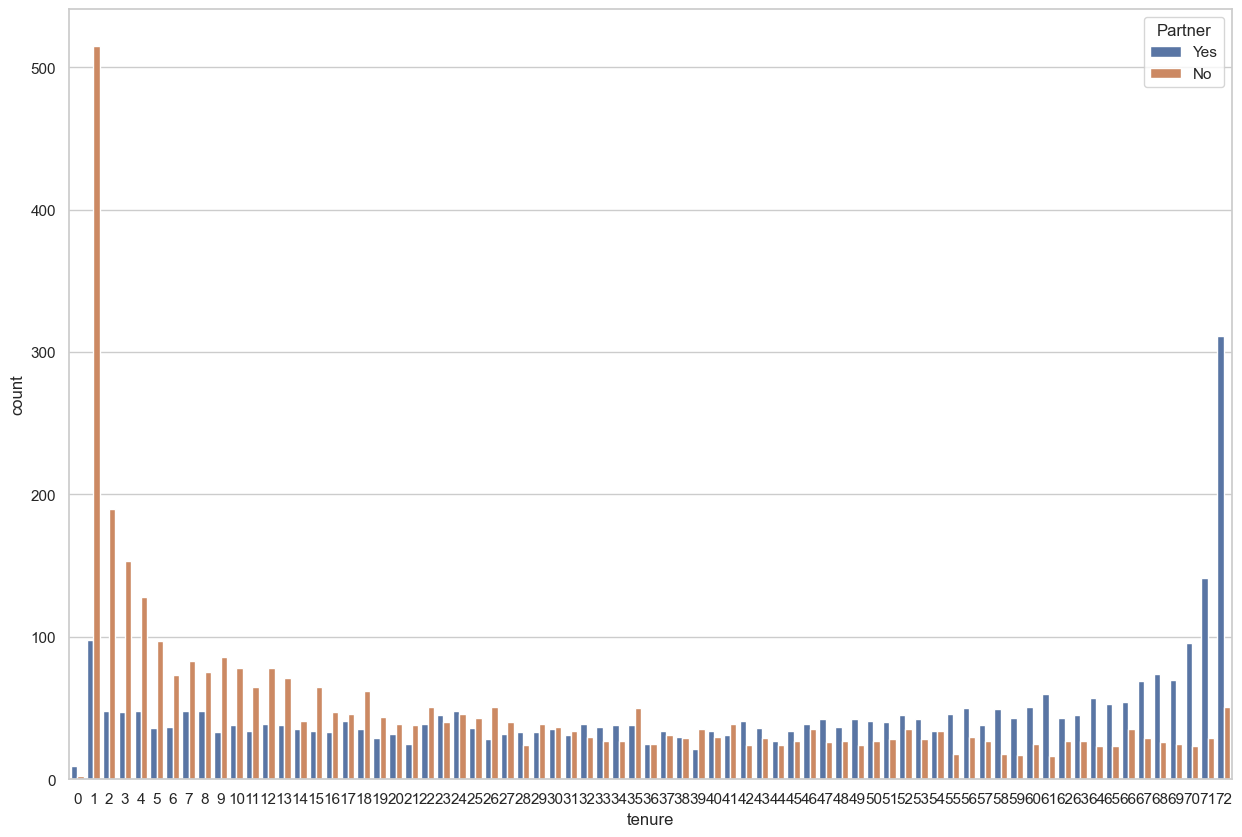

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(x='tenure',hue='Partner',data=df)
plt.show()



"The chart above confirms that people with partners tend to stay longer with the company.

In summary, the key insights from this analysis are:

1. Customers with partners, particularly those in relationships, prove to be highly lucrative for the company. They exhibit longer tenures and higher spending."

Great, it seems we've gathered valuable insights from exploring our clients' demographic attributes. Now, let's shift our focus to our products. We'll determine which one is the most lucrative and whether it aligns with the one showing the highest loyalty.

In [79]:
df.InternetService.value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

Approximately 21% of clients do not use internet services. It could be a valuable idea to explore ways to encourage them to use our internet services. Perhaps, utilizing clustering algorithms to uncover specific characteristics that could be advantageous.

.

At this point, it might be a good time to segment our dataset and concentrate on clients who use internet services. But before we proceed, let's take a closer look.

In [80]:
pd.crosstab(df.InternetService,df.PhoneService,margins=True)

PhoneService,No,Yes,All
InternetService,,,
DSL,682,1739,2421
Fiber optic,0,3096,3096
No,0,1526,1526
All,682,6361,7043


Clients who don't use phone services opt for the DSL internet service, while Fiber Optic is available only for those who have phone services.

For clients using phone services, DSL remains a viable option. We're beginning to gain insights into the company's product strategy.

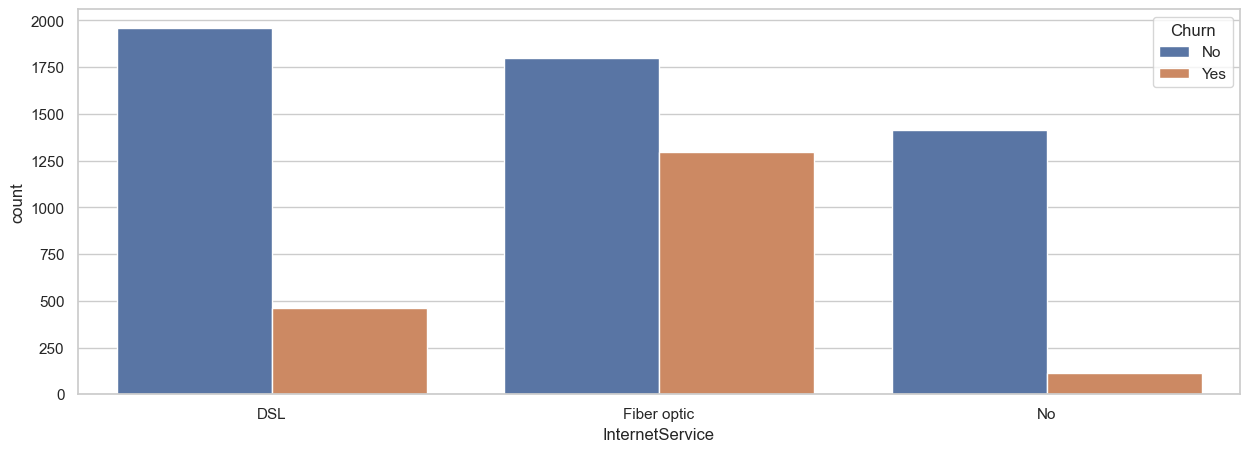

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'InternetService',hue='Churn',data=df)
plt.show()

There is a substantial churn tendency in Fiber Optic services, which could indicate significant dissatisfaction with this service.

In [82]:
df.groupby('InternetService')['TotalCharges'].mean().round()

InternetService
DSL            2115.0
Fiber optic    3205.0
No              663.0
Name: TotalCharges, dtype: float64

### After conducting the above Exploratory Data Analysis (EDA), we will proceed to develop predictive models and conduct a comparative analysis.

We will develop five predictive models: Logistic Regression, Random Forest, SVM, ADA Boost, and XG Boost

### 1. Logistic Regression

In [83]:
#Removing missing values
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [84]:
# We will utilize the dataframe with the created dummy variables
y = df_dummies['Churn'].values
X= df_dummies.drop(columns=['Churn'])

# now scaling all variables 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X= pd.DataFrame(scaler.transform(X))
X.columns = features

In logistic regression, it's crucial to scale the variables to ensure they fall within the range of 0 to 1. This simple step improved the accuracy from 79.7% to 80.7%. Additionally, you'll observe that the variable importance aligns with our findings in the Random Forest algorithm and the earlier EDA.

In [85]:
# create Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [87]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8045433033601515


Axes(0.125,0.11;0.775x0.77)


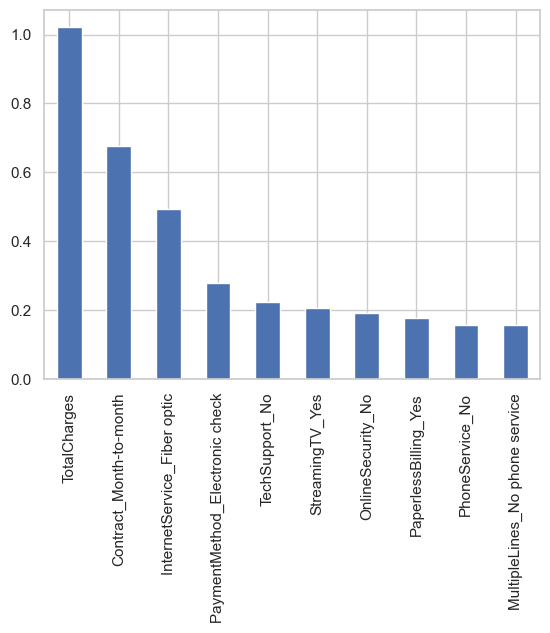

In [88]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))



"We can observe that some variables have a negative relation to our predicted variable (Churn), while others have a positive relation. A negative relation indicates that the likelihood of churn decreases with that variable. Let's summarize some of the interesting features:

1. As seen in our earlier EDA, having a 2-month contract reduces the chances of churn. 2-month contracts and tenure have the most negative relation with Churn, as predicted by logistic regression.
2. Having DSL internet service also reduces the probability of Churn.
3. On the other hand, total charges, monthly contracts, fiber optic internet services, and seniority can lead to higher churn rates. It's noteworthy that fiber optic services, despite being faster, might lead to higher churn rates. We need further exploration to better understand this phenomenon.

Any hypotheses on the above would be greatly appreciated!"

## 2. Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt",
                                  max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test)
print(accuracy)

0.7977288857345636


<Axes: >

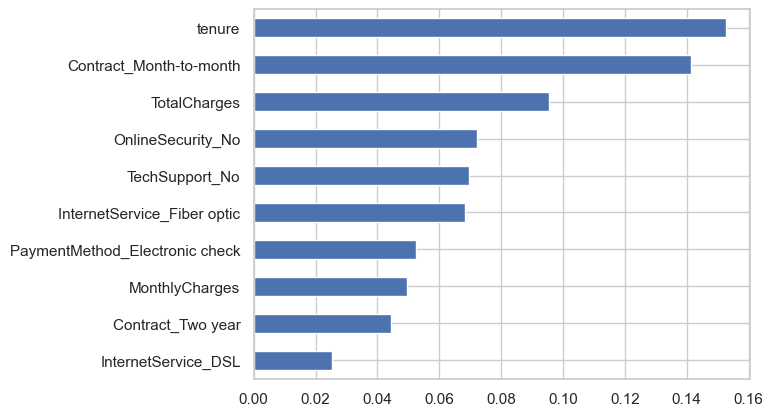

In [90]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

1. In the Random Forest algorithm, monthly contracts, tenure, and total charges emerge as the most important predictor variables for predicting churn.

2. These results align closely with those obtained from logistic regression and are consistent with our expectations based on the EDA

## 3. Support Vector Machine(SVM)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [92]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7892122072391767

In [93]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

[[915 108]
 [189 197]]




"With SVM, we achieved an accuracy of up to 78%. However, we'll dig deeper into the true positive and true negative rates, including the Area Under the Curve (AUC), to enhance our predictions. Stay tuned for more insights!"

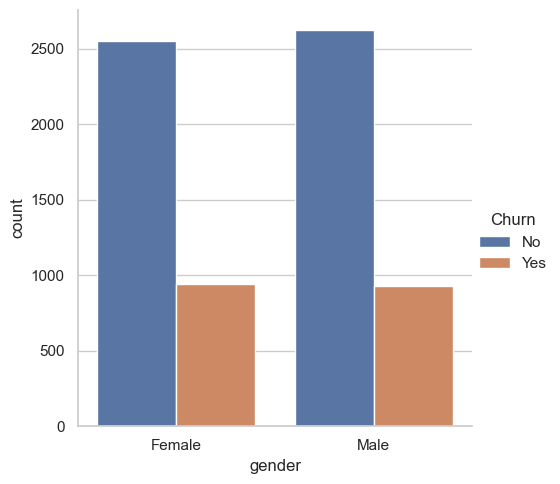

In [94]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=df,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

### 4. ADA Boost

In [95]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8034066713981547